In [1]:
import sys
sys.path.append('../../')

In [2]:
#import importlib
#import src
#importlib.reload(src.utils.read_tif)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from src.semantic_segmentation.unet.dataloader import class_distr
import numpy as np

/opt/conda/envs/marida/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libjpeg.so.8: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [5]:
print(class_distr.sum())

tensor(1.)


In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
#import cv2 as cv
from osgeo import gdal
import glob
from collections import Counter

In [7]:
from src.utils.utils import get_patch_name_from_prediction_name

In [8]:
from src.utils.read_tif import acquire_data, tif_2_rgb, tif_2_fdi, tif_2_ndvi, tif_2_swir
from src.utils.utils import get_tile_name_from_prediction_name, get_patch_name_from_prediction_name
from src.utils.assets import labels

In [9]:
seed = 0
folder_patches = "../../data/patches/" #"../../data/predicted_unet/"
folder_input_images = "../../data/patches/"
tif_ext = ".tif"

In [13]:
for file_name in os.listdir(folder_patches):
    print(file_name)

S2_1-12-19_48MYU
S2_11-1-19_19QDA
S2_11-6-18_16PCC
S2_12-1-17_16PCC
S2_12-1-17_16PEC
S2_12-1-19_16PEC
S2_12-12-20_16PCC
S2_13-12-18_16PCC
S2_14-11-18_48PZC
S2_14-12-20_18QYF
S2_14-3-20_18QYF
S2_14-9-18_16PCC
S2_15-10-20_18QYF
S2_15-11-20_16PCC
S2_15-9-20_18QYF
S2_16-2-18_16PEC
S2_17-7-16_51PTS
S2_18-1-18_48PZC
S2_18-5-19_51PTS
S2_18-9-20_16PCC
S2_18-9-20_16PDC
S2_19-3-20_18QYF
S2_19-9-18_16PCC
S2_19-9-18_16PDC
S2_20-10-20_18QYF
S2_20-4-18_30VWH
S2_21-2-17_16PCC
S2_21-2-18_16PCC
S2_22-12-20_18QYF
S2_22-3-20_18QWF
S2_23-1-21_18QYF
S2_23-9-20_16PCC
S2_24-10-18_16PDC
S2_24-11-19_48PZC
S2_24-3-20_18QYF
S2_24-4-19_36JUN
S2_24-8-20_16PCC
S2_25-5-19_48MXU
S2_26-2-18_16PCC
S2_27-1-19_16PCC
S2_27-1-19_16QED
S2_28-9-20_16PCC
S2_28-9-20_16PDC
S2_29-11-15_16PEC
S2_29-11-20_18QYF
S2_29-12-20_18QYF
S2_29-8-17_51RVQ
S2_3-1-21_18QYF
S2_3-11-16_16PDC
S2_3-11-18_16PDC
S2_30-8-17_16PCC
S2_30-8-18_16PCC
S2_4-12-20_18QYF
S2_4-3-18_50LLR
S2_4-9-16_16PCC
S2_4-9-19_16PCC
S2_6-12-17_48MYU
S2_6-12-18_48MXU
S2_7-

{'lat': array([[524405., 524415., 524425., ..., 526935., 526945., 526955.],
       [524405., 524415., 524425., ..., 526935., 526945., 526955.],
       [524405., 524415., 524425., ..., 526935., 526945., 526955.],
       ...,
       [524405., 524415., 524425., ..., 526935., 526945., 526955.],
       [524405., 524415., 524425., ..., 526935., 526945., 526955.],
       [524405., 524415., 524425., ..., 526935., 526945., 526955.]]), 'lon': array([[6251355., 6251355., 6251355., ..., 6251355., 6251355., 6251355.],
       [6251345., 6251345., 6251345., ..., 6251345., 6251345., 6251345.],
       [6251335., 6251335., 6251335., ..., 6251335., 6251335., 6251335.],
       ...,
       [6248825., 6248825., 6248825., ..., 6248825., 6248825., 6248825.],
       [6248815., 6248815., 6248815., ..., 6248815., 6248815., 6248815.],
       [6248805., 6248805., 6248805., ..., 6248805., 6248805., 6248805.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 64

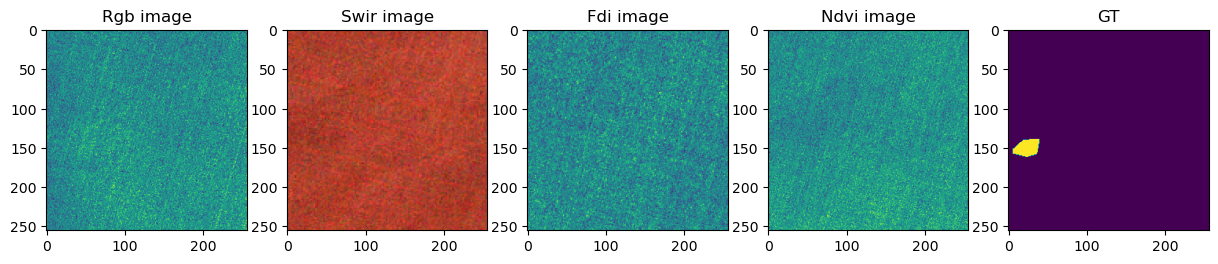

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'lat': array([[524405., 524415., 524425., ..., 526935., 526945., 526955.],
       [524405., 524415., 524425., ..., 526935., 526945., 526955.],
       [524405., 524415., 524425., ..., 526935., 526945., 526955.],
       ...,
       [524405., 524415., 524425., ..., 526935., 526945., 526955.],
       [524405., 524415., 524425., ..., 526935., 526945., 526955.],
       [524405., 524415., 524425., ..., 526935., 526945., 526955.]]), 'lon': array([[6241115., 6241115., 6241115., ..., 6241115., 6241115., 6241115.],
       [6241105., 6241105., 6241105., ..., 6241105., 6241105., 6241105.],
       [6241095., 6241095., 6241095., ..., 6241095., 6241095., 6241095.],
       ...,
       [6238585., 6238585., 6238585., ..., 6238585., 6238585., 6238585.],
       [6238575., 6238575., 6238575., ..., 6238575., 6238575., 6238575.],
       [6238565., 6238565., 6238565., ..., 6238565., 6238565., 6238565.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 64

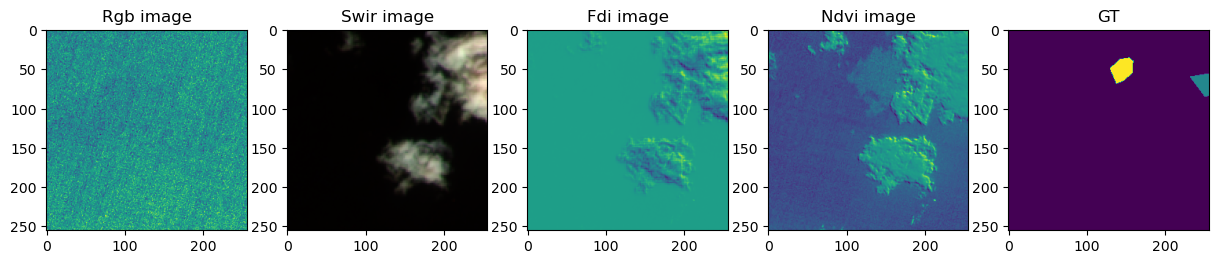

{'lat': array([[526965., 526975., 526985., ..., 529495., 529505., 529515.],
       [526965., 526975., 526985., ..., 529495., 529505., 529515.],
       [526965., 526975., 526985., ..., 529495., 529505., 529515.],
       ...,
       [526965., 526975., 526985., ..., 529495., 529505., 529515.],
       [526965., 526975., 526985., ..., 529495., 529505., 529515.],
       [526965., 526975., 526985., ..., 529495., 529505., 529515.]]), 'lon': array([[6243675., 6243675., 6243675., ..., 6243675., 6243675., 6243675.],
       [6243665., 6243665., 6243665., ..., 6243665., 6243665., 6243665.],
       [6243655., 6243655., 6243655., ..., 6243655., 6243655., 6243655.],
       ...,
       [6241145., 6241145., 6241145., ..., 6241145., 6241145., 6241145.],
       [6241135., 6241135., 6241135., ..., 6241135., 6241135., 6241135.],
       [6241125., 6241125., 6241125., ..., 6241125., 6241125., 6241125.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 64

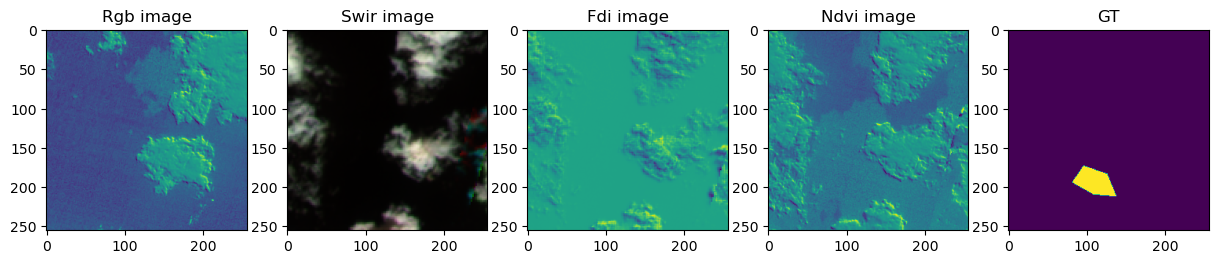

{'lat': array([[526965., 526975., 526985., ..., 529495., 529505., 529515.],
       [526965., 526975., 526985., ..., 529495., 529505., 529515.],
       [526965., 526975., 526985., ..., 529495., 529505., 529515.],
       ...,
       [526965., 526975., 526985., ..., 529495., 529505., 529515.],
       [526965., 526975., 526985., ..., 529495., 529505., 529515.],
       [526965., 526975., 526985., ..., 529495., 529505., 529515.]]), 'lon': array([[6241115., 6241115., 6241115., ..., 6241115., 6241115., 6241115.],
       [6241105., 6241105., 6241105., ..., 6241105., 6241105., 6241105.],
       [6241095., 6241095., 6241095., ..., 6241095., 6241095., 6241095.],
       ...,
       [6238585., 6238585., 6238585., ..., 6238585., 6238585., 6238585.],
       [6238575., 6238575., 6238575., ..., 6238575., 6238575., 6238575.],
       [6238565., 6238565., 6238565., ..., 6238565., 6238565., 6238565.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 62

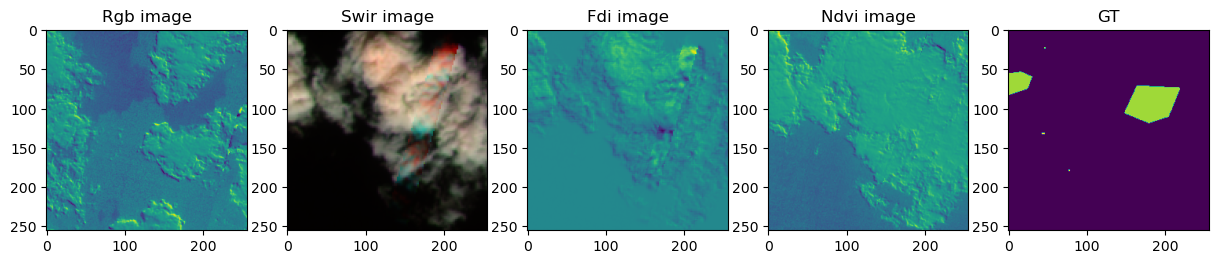

{'lat': array([[532085., 532095., 532105., ..., 534615., 534625., 534635.],
       [532085., 532095., 532105., ..., 534615., 534625., 534635.],
       [532085., 532095., 532105., ..., 534615., 534625., 534635.],
       ...,
       [532085., 532095., 532105., ..., 534615., 534625., 534635.],
       [532085., 532095., 532105., ..., 534615., 534625., 534635.],
       [532085., 532095., 532105., ..., 534615., 534625., 534635.]]), 'lon': array([[6228315., 6228315., 6228315., ..., 6228315., 6228315., 6228315.],
       [6228305., 6228305., 6228305., ..., 6228305., 6228305., 6228305.],
       [6228295., 6228295., 6228295., ..., 6228295., 6228295., 6228295.],
       ...,
       [6225785., 6225785., 6225785., ..., 6225785., 6225785., 6225785.],
       [6225775., 6225775., 6225775., ..., 6225775., 6225775., 6225775.],
       [6225765., 6225765., 6225765., ..., 6225765., 6225765., 6225765.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 65

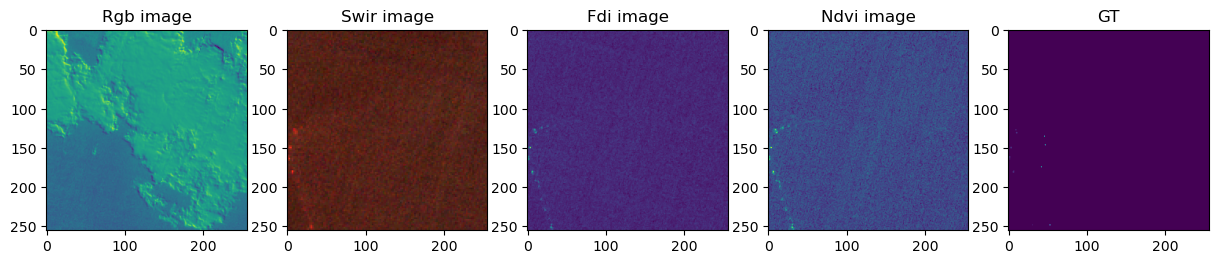

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'lat': array([[532085., 532095., 532105., ..., 534615., 534625., 534635.],
       [532085., 532095., 532105., ..., 534615., 534625., 534635.],
       [532085., 532095., 532105., ..., 534615., 534625., 534635.],
       ...,
       [532085., 532095., 532105., ..., 534615., 534625., 534635.],
       [532085., 532095., 532105., ..., 534615., 534625., 534635.],
       [532085., 532095., 532105., ..., 534615., 534625., 534635.]]), 'lon': array([[6225755., 6225755., 6225755., ..., 6225755., 6225755., 6225755.],
       [6225745., 6225745., 6225745., ..., 6225745., 6225745., 6225745.],
       [6225735., 6225735., 6225735., ..., 6225735., 6225735., 6225735.],
       ...,
       [6223225., 6223225., 6223225., ..., 6223225., 6223225., 6223225.],
       [6223215., 6223215., 6223215., ..., 6223215., 6223215., 6223215.],
       [6223205., 6223205., 6223205., ..., 6223205., 6223205., 6223205.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 65

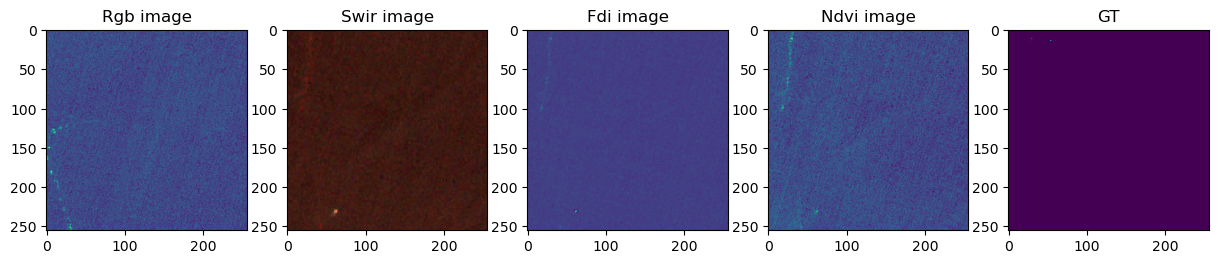

{'lat': array([[534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       ...,
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.]]), 'lon': array([[6243675., 6243675., 6243675., ..., 6243675., 6243675., 6243675.],
       [6243665., 6243665., 6243665., ..., 6243665., 6243665., 6243665.],
       [6243655., 6243655., 6243655., ..., 6243655., 6243655., 6243655.],
       ...,
       [6241145., 6241145., 6241145., ..., 6241145., 6241145., 6241145.],
       [6241135., 6241135., 6241135., ..., 6241135., 6241135., 6241135.],
       [6241125., 6241125., 6241125., ..., 6241125., 6241125., 6241125.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 65

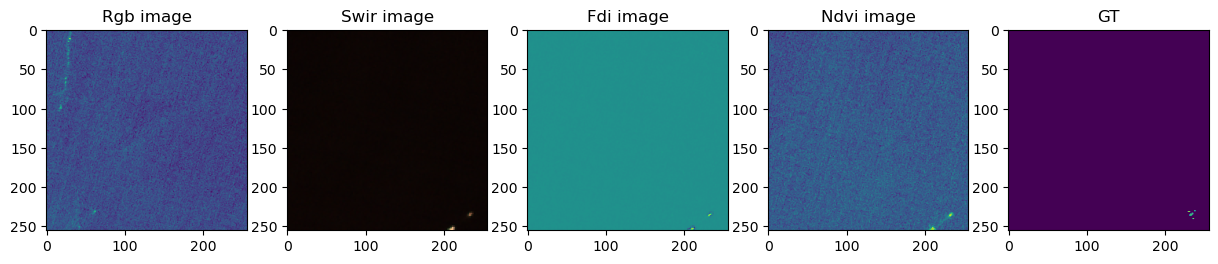

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'lat': array([[534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       ...,
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.]]), 'lon': array([[6235995., 6235995., 6235995., ..., 6235995., 6235995., 6235995.],
       [6235985., 6235985., 6235985., ..., 6235985., 6235985., 6235985.],
       [6235975., 6235975., 6235975., ..., 6235975., 6235975., 6235975.],
       ...,
       [6233465., 6233465., 6233465., ..., 6233465., 6233465., 6233465.],
       [6233455., 6233455., 6233455., ..., 6233455., 6233455., 6233455.],
       [6233445., 6233445., 6233445., ..., 6233445., 6233445., 6233445.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 65

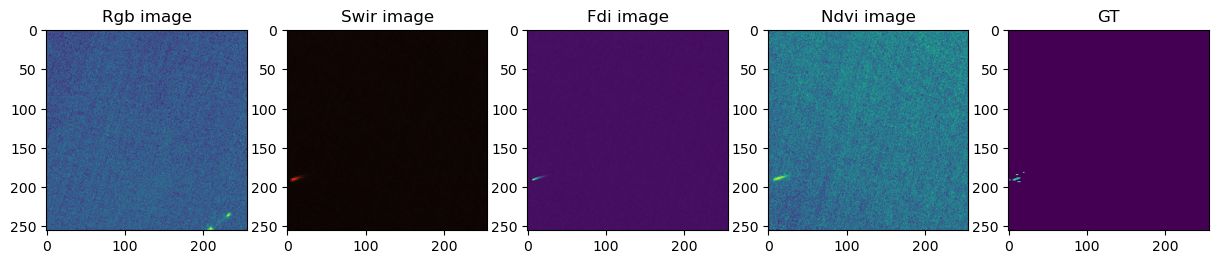

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'lat': array([[534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       ...,
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.],
       [534645., 534655., 534665., ..., 537175., 537185., 537195.]]), 'lon': array([[6233435., 6233435., 6233435., ..., 6233435., 6233435., 6233435.],
       [6233425., 6233425., 6233425., ..., 6233425., 6233425., 6233425.],
       [6233415., 6233415., 6233415., ..., 6233415., 6233415., 6233415.],
       ...,
       [6230905., 6230905., 6230905., ..., 6230905., 6230905., 6230905.],
       [6230895., 6230895., 6230895., ..., 6230895., 6230895., 6230895.],
       [6230885., 6230885., 6230885., ..., 6230885., 6230885., 6230885.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 62

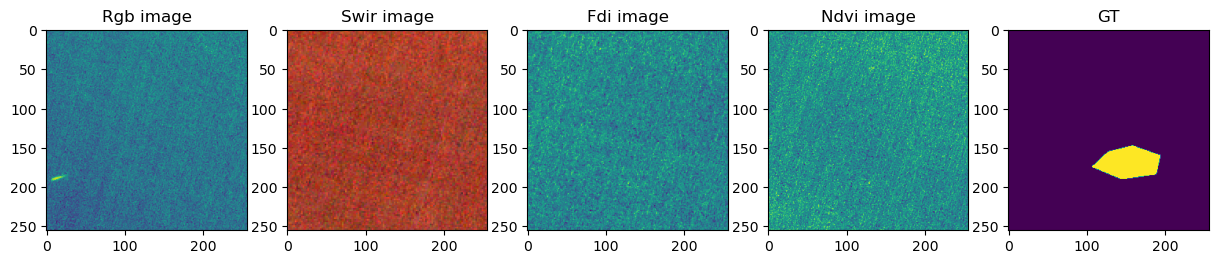

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'lat': array([[539765., 539775., 539785., ..., 542295., 542305., 542315.],
       [539765., 539775., 539785., ..., 542295., 542305., 542315.],
       [539765., 539775., 539785., ..., 542295., 542305., 542315.],
       ...,
       [539765., 539775., 539785., ..., 542295., 542305., 542315.],
       [539765., 539775., 539785., ..., 542295., 542305., 542315.],
       [539765., 539775., 539785., ..., 542295., 542305., 542315.]]), 'lon': array([[6230875., 6230875., 6230875., ..., 6230875., 6230875., 6230875.],
       [6230865., 6230865., 6230865., ..., 6230865., 6230865., 6230865.],
       [6230855., 6230855., 6230855., ..., 6230855., 6230855., 6230855.],
       ...,
       [6228345., 6228345., 6228345., ..., 6228345., 6228345., 6228345.],
       [6228335., 6228335., 6228335., ..., 6228335., 6228335., 6228335.],
       [6228325., 6228325., 6228325., ..., 6228325., 6228325., 6228325.]])}
________________________________________S2_20-4-18_30VWH________________________________________
{'0': 44

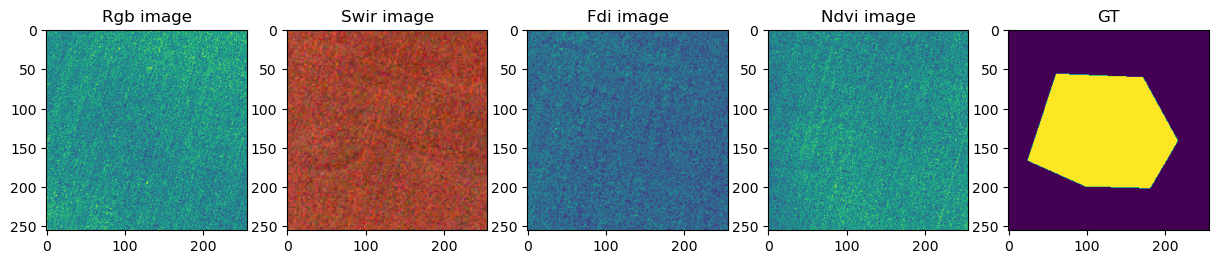

________________________________________________________________________________
Pixels for each category of the looped images:
{'0': 625424, 'Marine Water': 24393, 'Clouds': 3505, 'Cloud Shadows': 1975, 'Marine Debris': 27, 'Ship': 36}


In [12]:
i = 0
agg_to_water = False
plot = True
total_pixels_dataset = {}
desired_patch= "S2_20-4-18_30VWH"
for file_name in os.listdir(folder_patches):
    annotaions_counter = len(glob.glob1(folder_patches + file_name,"*_cl.tif"))
    for idx_patch in range(annotaions_counter):
        if file_name == desired_patch:
            index_sub_plot = 0
            tile_name = get_tile_name_from_prediction_name(file_name)
            patch_name = get_patch_name_from_prediction_name(file_name)
            if plot:
                f, axarr = plt.subplots(1, 5, figsize=(15, 5))
                
                
                # Plot rgb image
                tif_path = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + tif_ext
                img_rgb_z, coords = tif_2_rgb(tif_path)
                axarr[index_sub_plot].set_title("Rgb image")
                axarr[index_sub_plot].imshow(img_rgb)
                index_sub_plot += 1
                # Plot swir image
                tif_path = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + tif_ext
                img_rgb = tif_2_swir(tif_path)
                axarr[index_sub_plot].set_title("Swir image")
                axarr[index_sub_plot].imshow(img_rgb)
                index_sub_plot += 1
                # Plot fdi image
                tif_path = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + tif_ext
                img_rgb = tif_2_fdi(tif_path)
                axarr[index_sub_plot].set_title("Fdi image")
                axarr[index_sub_plot].imshow(img_rgb)
                index_sub_plot += 1
                # Plot ndvi image
                tif_path = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + tif_ext
                img_rgb = tif_2_ndvi(tif_path)
                axarr[index_sub_plot].set_title("Ndvi image")
                axarr[index_sub_plot].imshow(img_rgb)
                index_sub_plot += 1
                
            
            # Plot semantic segmentation map
            roi_file_cl = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + "_cl" + tif_ext        
            ds = gdal.Open(roi_file_cl)
            temp = np.copy(ds.ReadAsArray().astype(np.int64))
            unique, counts = np.unique(temp, return_counts=True)
            
            labels_in_img = [labels[label_idx - 1] if label_idx > 0 else "0" for label_idx in unique]
            pixels_in_img = dict(zip(labels_in_img, counts))
            
            total_pixels_dataset = dict(Counter(total_pixels_dataset) + Counter(pixels_in_img))

            
            if plot:
                axarr[index_sub_plot].set_title("GT")
                axarr[index_sub_plot].imshow(temp)
                index_sub_plot += 1
            
            # Aggregation
            if agg_to_water:
                temp[temp == 15] = 7  # Mixed Water to Marine Water Class
                temp[temp == 14] = 7  # Wakes to Marine Water Class
                temp[temp == 13] = 7  # Cloud Shadows to Marine Water Class
                temp[temp == 12] = 7  # Waves to Marine Water Class

            # Categories from 1 to 0
            temp = np.copy(temp - 1)
            
            
            # Plot prediction
            #path = folder_predictions + file_name
            #img_pred, _ = acquire_data(path)
            #axarr[index_sub_plot].set_title("Prediction")
            #axarr[index_sub_plot].imshow(img_pred)
            
            print("_" * 40 + f"{file_name}"+ "_" * 40)
            print(pixels_in_img) # pixels for each category in the current image
            if plot:
                plt.show()
    
    i += 1

print("_" * 80 + "\nPixels for each category of the looped images:")
print(total_pixels_dataset)

In [ ]:
import rasterio.mask as mask
out_img, out_transform = mask(raster=, shapes=coords, crop=True)

In [8]:
"""
i = 0

for file_name in os.listdir(folder_predictions):
    if i >= 50 and i < 70:
        index_sub_plot = 0
        tile_name = get_tile_name_from_prediction_name(file_name)
        patch_name = get_patch_name_from_prediction_name(file_name)
        
        f, axarr = plt.subplots(1, 5, figsize=(15, 5))
        
        
        # Plot rgb image
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext
        img_rgb = tif_2_rgb(tif_path)
        axarr[index_sub_plot].set_title("Rgb image")
        axarr[index_sub_plot].imshow(img_rgb)
        index_sub_plot += 1
        # Plot swir image
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext
        img_rgb = tif_2_swir(tif_path)
        axarr[index_sub_plot].set_title("Swir image")
        axarr[index_sub_plot].imshow(img_rgb)
        index_sub_plot += 1
        # Plot fdi image
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext
        img_rgb = tif_2_fdi(tif_path)
        axarr[index_sub_plot].set_title("Fdi image")
        axarr[index_sub_plot].imshow(img_rgb)
        index_sub_plot += 1
        # Plot ndvi image
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext
        img_rgb = tif_2_ndvi(tif_path)
        axarr[index_sub_plot].set_title("Ndvi image")
        axarr[index_sub_plot].imshow(img_rgb)
        index_sub_plot += 1
        # Plot semantic segmentation map
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + "_cl" + tif_ext
        img_pred, _ = acquire_data(tif_path)
        axarr[index_sub_plot].set_title("GT")
        axarr[index_sub_plot].imshow(img_pred)
        index_sub_plot += 1
        # Plot prediction
        #path = folder_predictions + file_name
        #img_pred, _ = acquire_data(path)
        #axarr[index_sub_plot].set_title("Prediction")
        #axarr[index_sub_plot].imshow(img_pred)
        
        print("_" * 40 + f"{file_name}"+ "_" * 40)

        plt.show()
    
    i += 1
"""

'\ni = 0\n\nfor file_name in os.listdir(folder_predictions):\n    if i >= 50 and i < 70:\n        index_sub_plot = 0\n        tile_name = get_tile_name_from_prediction_name(file_name)\n        patch_name = get_patch_name_from_prediction_name(file_name)\n        \n        f, axarr = plt.subplots(1, 5, figsize=(15, 5))\n        \n        \n        # Plot rgb image\n        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext\n        img_rgb = tif_2_rgb(tif_path)\n        axarr[index_sub_plot].set_title("Rgb image")\n        axarr[index_sub_plot].imshow(img_rgb)\n        index_sub_plot += 1\n        # Plot swir image\n        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext\n        img_rgb = tif_2_swir(tif_path)\n        axarr[index_sub_plot].set_title("Swir image")\n        axarr[index_sub_plot].imshow(img_rgb)\n        index_sub_plot += 1\n        # Plot fdi image\n        tif_path = folder_input_images + tile_name + "/" + patch_

In [13]:
import os
import ast
import sys
import json
import random
import logging
import argparse
import numpy as np
from tqdm import tqdm
from os.path import dirname as up

import torch
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader

from src.semantic_segmentation.unet.dataloader import (
    AnomalyMarineDataset,
    bands_mean,
    bands_std,
    RandomRotationTransform,
    class_distr,
    gen_weights,
)


def seed_all(seed):
    # Pytorch Reproducibility
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


def seed_worker(worker_id):
    # DataLoader Workers Reproducibility
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

seed_all(0)
g = torch.Generator()
g.manual_seed(0)

# Transformations

transform_train = transforms.Compose(
    [
        transforms.ToTensor(),
        RandomRotationTransform([-90, 0, 90, 180]),
        transforms.RandomHorizontalFlip(),
    ]
)

transform_test = transforms.Compose([transforms.ToTensor()])

standardization = transforms.Normalize(bands_mean, bands_std)


dataset_train = AnomalyMarineDataset(
    "train",
    transform=transform_train,
    standardization=standardization,
    agg_to_water=True,
    path="/data/anomaly-marine-detection/data"
)


train_loader = DataLoader(
    dataset_train,
    batch_size=1,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
    prefetch_factor=True,
    persistent_workers=True,
    worker_init_fn=seed_worker,
    generator=g,
)

Load train set to memory: 100%|██████████| 694/694 [00:07<00:00, 93.82it/s] 


In [19]:
def s2_2_rgb(s2_img: str) -> np.ndarray:
    img_b = s2_img[1, :, :].reshape(s2_img.shape[-2], s2_img.shape[-1], 1)
    img_g = s2_img[2, :, :].reshape(s2_img.shape[-2], s2_img.shape[-1], 1)
    img_r = s2_img[3, :, :].reshape(s2_img.shape[-2], s2_img.shape[-1], 1)

    img_rgb = np.concatenate((img_r, img_g, img_b), 2)
    print(img_rgb.shape)
    img_rgb = img_rgb / img_rgb.max()
    return img_rgb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-0.2881) tensor(0.2284)
torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256, 3)
[-1  9]
-1.2140551 1.0


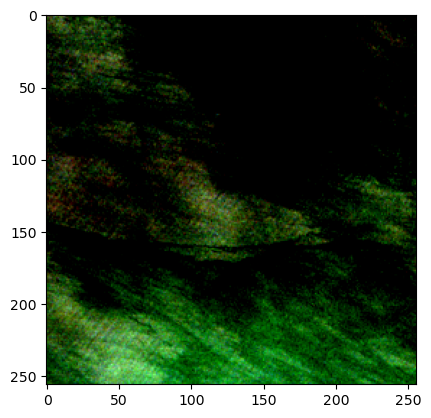

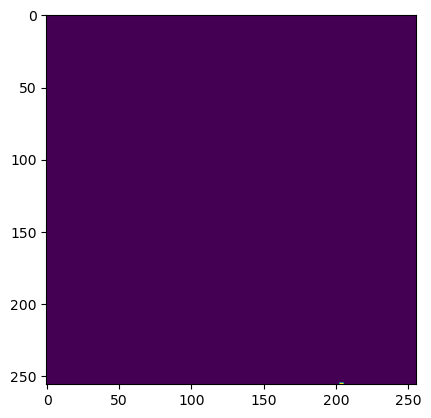

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-0.5905) tensor(-0.1109)
torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256, 3)
[-1 10]
1.0 5.323493


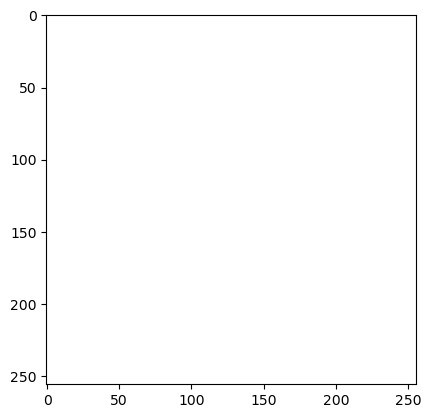

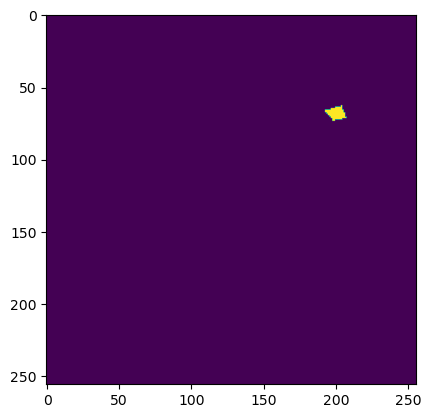

tensor(0.5271) tensor(7.5515)
torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256, 3)
[-1  5]
0.11254518 1.0


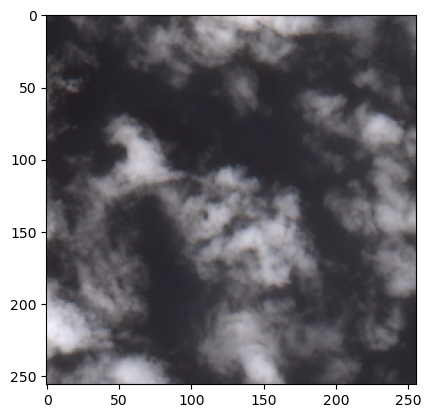

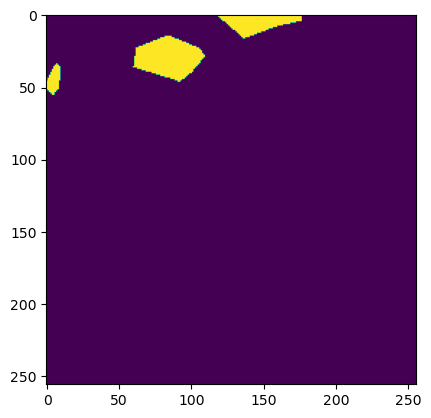

In [20]:
j = 0
n = 2
for img, target in train_loader:
    img = img[0]
    print(torch.min(img), torch.max(img))
    print(img.shape)
    img = np.array(img)
    print(img.shape)
    j += 1
    rgb_img = s2_2_rgb(img)
    print(np.unique(target))
    print(np.min(rgb_img), np.max(rgb_img))
    plt.imshow(rgb_img, vmin=0, vmax=255)
    plt.show()
    plt.imshow(target[0])
    plt.show()
    if j > n:
        break

array([-1, 10])

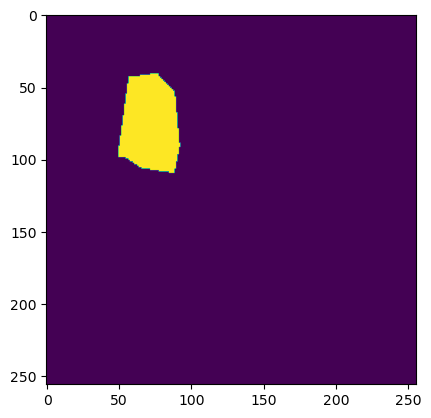